## _Supervised Learning:   Random Forest Classifier, Linear Classifier_

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
# Read data

root_path = ''

In [16]:
df = pd.read_csv(root_path + 'credit_approval.csv')

In [17]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  690 non-null    int64  
 1   1           690 non-null    int64  
 2   2           690 non-null    float64
 3   3           690 non-null    float64
 4   4           690 non-null    int64  
 5   5           690 non-null    int64  
 6   6           690 non-null    int64  
 7   7           690 non-null    float64
 8   8           690 non-null    int64  
 9   9           690 non-null    int64  
 10  10          690 non-null    int64  
 11  11          690 non-null    int64  
 12  12          690 non-null    int64  
 13  13          690 non-null    int64  
 14  14          690 non-null    int64  
 15  15          690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [19]:
df.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

### Exploring Data

In [20]:
import matplotlib.pyplot as plt

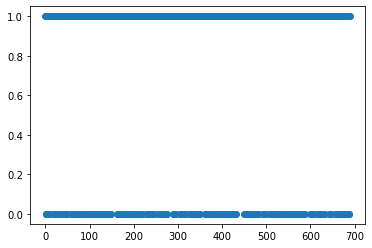

In [21]:
# Categorical attributes

plt.scatter(range(len(df)), df['1'])

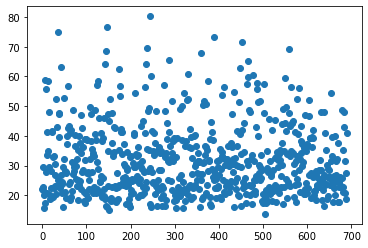

In [22]:
# Numerical attributes

plt.scatter(range(len(df)), df['2'])

### Preprocessing

### Task 0

**a)** Rename the first 14th (relevant) columns as `col1`, `col2` ... `col14` and the last column as `target`. Your function should return both the data corresponding to the _X values_ and the _Y values_.

_Hint:_ You can use the `drop` function explained [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to eliminate the first column.

In [ ]:
def clean_df(df):
    'TO DO'
    return None

In [ ]:
dataX, dataY = clean_df(df)

In [ ]:
# Verify result
dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


**b)** Which columns could be classified as categorical? Plot one column of your choice containing numerical values. Justify your choice (please use the `markdown` option provided in your notebook).

In [ ]:
# TO DO: 

In [ ]:
# Verify result
dataY.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

**c)** Does the data stored in the `target` data frame have numerical attributes? Besides the graphical representation, how can the values of a column be classified as numerical or categorical?

In [ ]:
# TO DO:

### Normalization

### Task 1

The following formula computes a _Z score_ and measures how far a single raw data value is from the population mean.

\begin{equation*}
z = \frac{X - \mu }{\sigma }
\end{equation*}

where:
* **_X_** is a single raw data value
* `mu` is the population mean
* `sigma` is the population standard deviation

The `compute_stats` function receives a `DataFrame object` for which builds a `stats DataFrame` where the mean and standard deviation are computed for each column of the input.

The final result should have 3 columns:
* the name of the column for which the mean and the standard deviation were computed,
* the mean column computed for the values in the corresponding column,
* the standard deviation computed for the values in the corresponding column.

_Hints:_ 
1. You might want to use `df.loc` property [which can be found here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

2. Verify your data by using `notnull()` [function.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

You may use:
`df.loc[df[column_name].notnull(), column_name]` to access all the elements of a column that are not null.

In [ ]:
def compute_stats(df):
    # Create a new DataFrame using df's columns as a starting point
    # stats = ...
    'TO DO'
    
    # Initialise the mean and std column by 0
    'TO DO'
    
    # Iterate through the columns of df and for each column compute mean and std.
    for col in df.columns:
        'TO DO'
    return stats

In [ ]:
stats_dataX = compute_stats(dataX)

In [ ]:
# Expected Output:
stats_dataX

,col_names,avg,std
0,col1,0.678261,0.467482
1,col2,31.568203,11.853273
2,col3,4.758725,4.978163
3,col4,1.766667,0.430063
4,col5,7.372464,3.683265
5,col6,4.692754,1.992316
6,col7,2.223406,3.346513
7,col8,0.523188,0.499824
8,col9,0.427536,0.495080
9,col10,2.400000,4.862940


To finish this task, use the `stats DataFrame` computed before and compute the _Z score_ formula.

In [ ]:
def normalize(df, s):
    # Iterate through the columns of df
    for col in df.columns:
        # Use the df.loc property & notnull() to select data
        'TO DO'
    return df

In [ ]:
norm_dataX = normalize(dataX, stats_dataX)

In [ ]:
# Expected Output:
norm_dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.688238,-0.800471,1.346134,0.542556,-0.915618,-0.347713,-0.190767,-1.046745,-0.863570,-0.493529,1.087120,0.237655,-0.488004,0.037353
1,-1.450880,-0.750696,0.450221,0.542556,0.170375,-0.347713,-0.615090,-1.046745,-0.863570,-0.493529,-0.918529,0.237655,-0.139490,-0.195272
2,-1.450880,-0.167735,-0.604384,-1.782685,-0.915618,-0.347713,-0.290872,-1.046745,-0.863570,-0.493529,1.087120,0.237655,0.557539,-0.195272
3,-1.450880,-0.835061,1.354169,-1.782685,-0.644120,-0.849641,-0.664395,0.953958,1.156306,1.768477,1.087120,0.237655,-1.068862,-0.195272
4,0.688238,-0.961608,0.685248,0.542556,-0.372622,-0.347713,-0.078711,0.953958,1.156306,2.385388,-0.918529,0.237655,-0.720347,-0.164946


### Task 2
 
Fill in the missing elements in:
 
**a)** the `get_score` function below:

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    # train_roc_scores = TO DO
    # test_roc_scores = TO DO
    return train_roc_scores, test_roc_scores

In [ ]:
# Perform k-fold manually
 
dataX_i = list(dataX.index.values)
 
import random
 
random.shuffle(dataX_i)

**b)** Store the rearranged indices in 5 different lists, congregated in the list of lists `xi`.

In [ ]:
# xi = TO DO

In [ ]:
print(xi)

[[2, 145, 388, 465, 477, 336, 491, 551, 435, 335, 247, 265, 324, 360, 235, 167, 328, 118, 352, 503, 332, 365, 642, 275, 181, 636, 599, 467, 119, 97, 356, 284, 606, 22, 502, 285, 361, 170, 302, 292, 258, 262, 523, 109, 489, 298, 220, 428, 643, 340, 99, 609, 459, 471, 212, 66, 453, 342, 512, 193, 521, 576, 314, 550, 286, 448, 630, 625, 37, 674, 368, 166, 495, 85, 679, 391, 403, 421, 44, 103, 634, 351, 210, 273, 558, 117, 173, 638, 662, 243, 59, 404, 647, 219, 90, 556, 627, 168, 557, 592, 236, 644, 198, 151, 304, 337, 130, 653, 245, 154, 308, 3, 208, 319, 494, 49, 381, 62, 355, 367, 366, 204, 579, 615, 320, 531, 401, 687, 291, 146, 261, 42, 545, 266, 127, 283, 57, 254], [0, 329, 631, 522, 587, 305, 432, 427, 667, 622, 153, 680, 682, 472, 231, 490, 379, 659, 232, 40, 27, 591, 54, 197, 310, 590, 295, 68, 131, 221, 4, 395, 657, 165, 668, 70, 559, 578, 585, 241, 671, 444, 60, 566, 7, 419, 572, 84, 115, 15, 447, 34, 300, 35, 105, 91, 677, 526, 505, 568, 311, 652, 376, 420, 306, 76, 612, 632, 3

In [ ]:
train_scores_lr = []
test_scores_lr = []

### Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against. [Source](https://doi.org/10.1007/978-0-387-39940-9_565)

One example of _Cross Validation_ techniques that can be useful is represented by k-fold cross validation. In our exercise, let us set the value of `k=5` such that we test different portions of our dataset and verify the performance of the model.

In [ ]:
i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Logistic Regression
    logReg = LogisticRegression(solver='liblinear')
    
    # Evaluate model
    train_slr, test_slr = get_score(logReg, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_lr.append(train_slr)
    test_scores_lr.append(test_slr)
    
    i += 1

C:\Users\cool_\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\cool_\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\cool_\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\cool_\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\cool_\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: T

In [ ]:
print('Logistic Regression scores TRAIN: ', train_scores_lr)
print('Logistic Regression scores TEST: ', test_scores_lr)

Logistic Regression scores TRAIN:  [0.918616452991453, 0.9320047987203414, 0.9308810244965195, 0.9354211062725841, 0.9142576908293238]
Logistic Regression scores TEST:  [0.9272650830355267, 0.8889357218124342, 0.9012135405578028, 0.9229094076655053, 0.9640086206896551]


In [ ]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores.to_csv(root_path + 'scores.csv')

### Task 3

**a)** Implement for this problem a Random Forest Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**b)** Implement for this problem a Linear Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**c)** Which algorithm performed best? Why?